### Importing libraries and calling necessay functions

1. Importing all the necessay packages for running the code
2. Accessing/Reading all the necessay functions from the Functions folder

In [1]:
import os
import json
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy.stats import probplot
from sklearn.utils import resample
from scipy.linalg import svd, qr
from sklearn.preprocessing import StandardScaler
from Functions import anoamly_detection
from main import OptimizingPlacement
from Functions.Optiming_functions import Shannon_nyquist_throrm
from Functions.video_generation import VideoGeneration
from Functions.Testing import Comparing_videos
from Functions.Optiming_functions import Alternative_method
from sklearn.model_selection import train_test_split

### Calling custom functions

1. Assingning variables to the functions that are calling.
2. Reading the values from .env file and assiginging them to variables.

In [2]:
# Initialize classes and functions
placement = OptimizingPlacement()
anomaly_detection = anoamly_detection.AnomalyDetection()
nyquist_throrm = Shannon_nyquist_throrm.NyquistTheorem()
reconstrucing_video = VideoGeneration()
testing_videos = Comparing_videos.ComparingVideos()
Alternative_filling_method = Alternative_method.AlternativeMethod()

#### Reading the necessay values from the .env file

In [3]:
# Retrieve environment variables
file_name = os.getenv('file_name')
sensor_data = os.getenv("folder_name")
zipped_file = os.getenv("ziped_file")
output_dir = os.getenv('sensor_heatmaps')
video_output = os.getenv('temperature_output')

### Data Gathering

1. Using the placement variable calling the function that performs the following operations as extrating the information from the .xlsx files grouping them and storing them to a seperate folder.
2. This the flow placement->extracting_files->(reading_all_excel files, sorting_values function in then Functions folder extrating_files )

In [5]:
# Extract files from the zipped folder
combined_data, keys_list = placement.extracting_files(file_name = zipped_file, sensor_data = sensor_data)

excel_file Sensor_data\Data17052024-210552024\Sensor data(0474D,04750,04754,04756,04757,0475A,0475C,0475D,04762,04763,04765,04768,0476E,04771,04773,0477F,04787,04789,0478A,0478C)(01_01_2024-20_05_2024).xlsx
excel_file Sensor_data\Data17052024-210552024\Sensor data[0474D,04750,04754,04756,04757,0475A,0475C,0475D,04762,04763,04765,04768,0476E,04771,04773,0477F,04787,04789,0478A,0478C](01_01_2024-20_05_2024) (1).xlsx
excel_file Sensor_data\Data17052024-210552024\Sensor data[0478E,04791,04792,04796,0479B,0479D,0479E,047A8,047AA,047AD,047B2,047B6,047B7,047B8,047BA,047BB,047BC,047C1](01_01_2024-20_05_2024).xlsx
excel_file Sensor_data\Data17052024-210552024\Sensor data[047C2,047C4,047C5,047C7,047C8,047C9,047CA,047CB,047CD,047CE,047D2,047D3,047D4,047D6,047D7,047DD,047F7,04802,04804,0480E](01_01_2024-20_05_2024).xlsx


KeyboardInterrupt: 

In [5]:
# Display the first few rows of the combined dataset
combined_data.head()

Time Temperature Humidity Sensor ID      Sensor Name
0 2024-05-14 02:18:22       15.25     92.8     047D6  047D6 T/RH IP67
1 2024-05-04 21:21:36       13.95       71     047D6  047D6 T/RH IP67
2 2024-05-04 21:26:37       13.65     71.8     047D6  047D6 T/RH IP67
3 2024-05-04 21:31:35        13.4     72.6     047D6  047D6 T/RH IP67
4 2024-05-04 21:36:36        13.4     73.4     047D6  047D6 T/RH IP67

In [6]:
# Check for missing values
combined_data.isnull().sum()

Time              0
Temperature    9351
Humidity       9351
Sensor ID         0
Sensor Name       0
dtype: int64

#### Converting to necessay column datatypes and adding Extra columns

In [7]:
# Convert data types for specific columns
combined_data['Humidity'] = combined_data['Humidity'].astype('float')
combined_data['Temperature'] = combined_data['Temperature'].astype('float')

In [8]:
# Add new columns for Day, Time_Instance, Year, Month, and flag for missing values
combined_data['Day'] = pd.DatetimeIndex(combined_data['Time']).day
combined_data['Time_Instance'] = pd.DatetimeIndex(combined_data['Time']).time
combined_data['Year'] = pd.DatetimeIndex(combined_data['Time']).year
combined_data['Month'] = pd.DatetimeIndex(combined_data['Time']).month

In [9]:
combined_data['flag'] = combined_data.isna().any(axis=1).astype(int)

### Data cleaning

#### Replacing NaN values with predicted Neural Network data

Epoch 1/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 7.4504 - val_loss: 11.2188
Epoch 2/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 5.2467 - val_loss: 22.3605
Epoch 3/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 5.3562 - val_loss: 5.1903
Epoch 4/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 984us/step - loss: 4.9402 - val_loss: 4.8843
Epoch 5/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 982us/step - loss: 4.9313 - val_loss: 5.6830
Epoch 6/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 979us/step - loss: 4.7727 - val_loss: 4.8030
Epoch 7/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 980us/step - loss: 4.7987 - val_loss: 4.8463
Epoch 8/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 993us/step - loss: 4.6630 - val_loss: 4.8560
Epoch 9/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 979us/step - loss: 4.5508 - val_loss: 4.9487
Epoch 10/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 995us/step - loss: 4.5020 - val_loss: 4.6820
Epoch 11/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 983us/step - loss: 4.5396 - val_loss: 4.6037
Epoch 12/

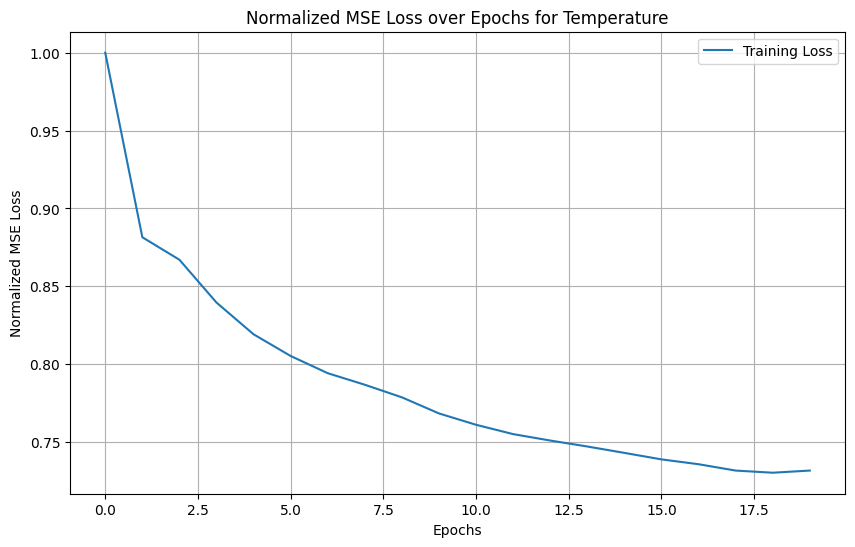

Epoch 1/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 51.3580 - val_loss: 52.0500
Epoch 2/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 979us/step - loss: 35.2522 - val_loss: 33.4470
Epoch 3/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 971us/step - loss: 34.8468 - val_loss: 33.3383
Epoch 4/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 977us/step - loss: 33.1778 - val_loss: 33.3396
Epoch 5/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 985us/step - loss: 33.0322 - val_loss: 34.3291
Epoch 6/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 984us/step - loss: 32.8701 - val_loss: 32.9582
Epoch 7/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 984us/step - loss: 33.1689 - val_loss: 33.3155
Epoch 8/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 991us/step - loss: 32.3923 - val_loss: 32.8767
Epoch 9/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 997us/step - loss: 32.4734 - val_loss: 36.3797
Epoch 10/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 994us/step - loss: 32.2865 - val_loss: 34.1278
Epoch 11/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 988us/step - loss: 32.1451 - val_lo

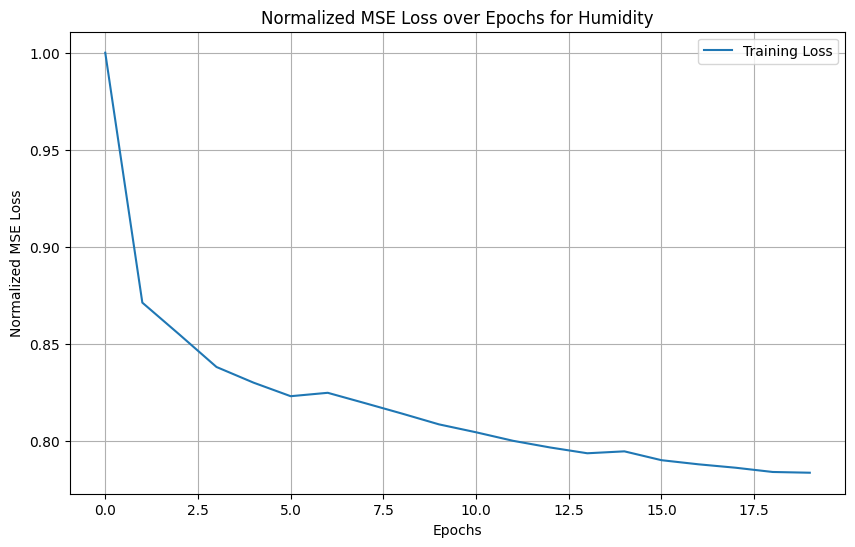

In [10]:
# Replace missing values in the dataset
final_dataset = placement.replacing_missing_values(combined_data)

#### Checking the Replaced NaN values

In [11]:
# Display specific rows of the final dataset
final_dataset.iloc[1000]

Time             2024-05-07 10:34:40
Temperature                     24.8
Humidity                        51.0
Sensor ID                      047D6
Sensor Name          047D6 T/RH IP67
Day                                7
Time_Instance               10:34:40
Year                            2024
Month                              5
flag                               0
Name: 1000, dtype: object

In [12]:
final_dataset.iloc[1001]

Time             2024-05-07 10:39:40
Temperature                    25.75
Humidity                       52.64
Sensor ID                      047D6
Sensor Name          047D6 T/RH IP67
Day                                7
Time_Instance               10:39:40
Year                            2024
Month                              5
flag                               1
Name: 1001, dtype: object

In [13]:
final_dataset.iloc[1002]

Time             2024-05-07 10:44:38
Temperature                     25.4
Humidity                        51.5
Sensor ID                      047D6
Sensor Name          047D6 T/RH IP67
Day                                7
Time_Instance               10:44:38
Year                            2024
Month                              5
flag                               0
Name: 1002, dtype: object

#### Plotting the NaN values for a sensor

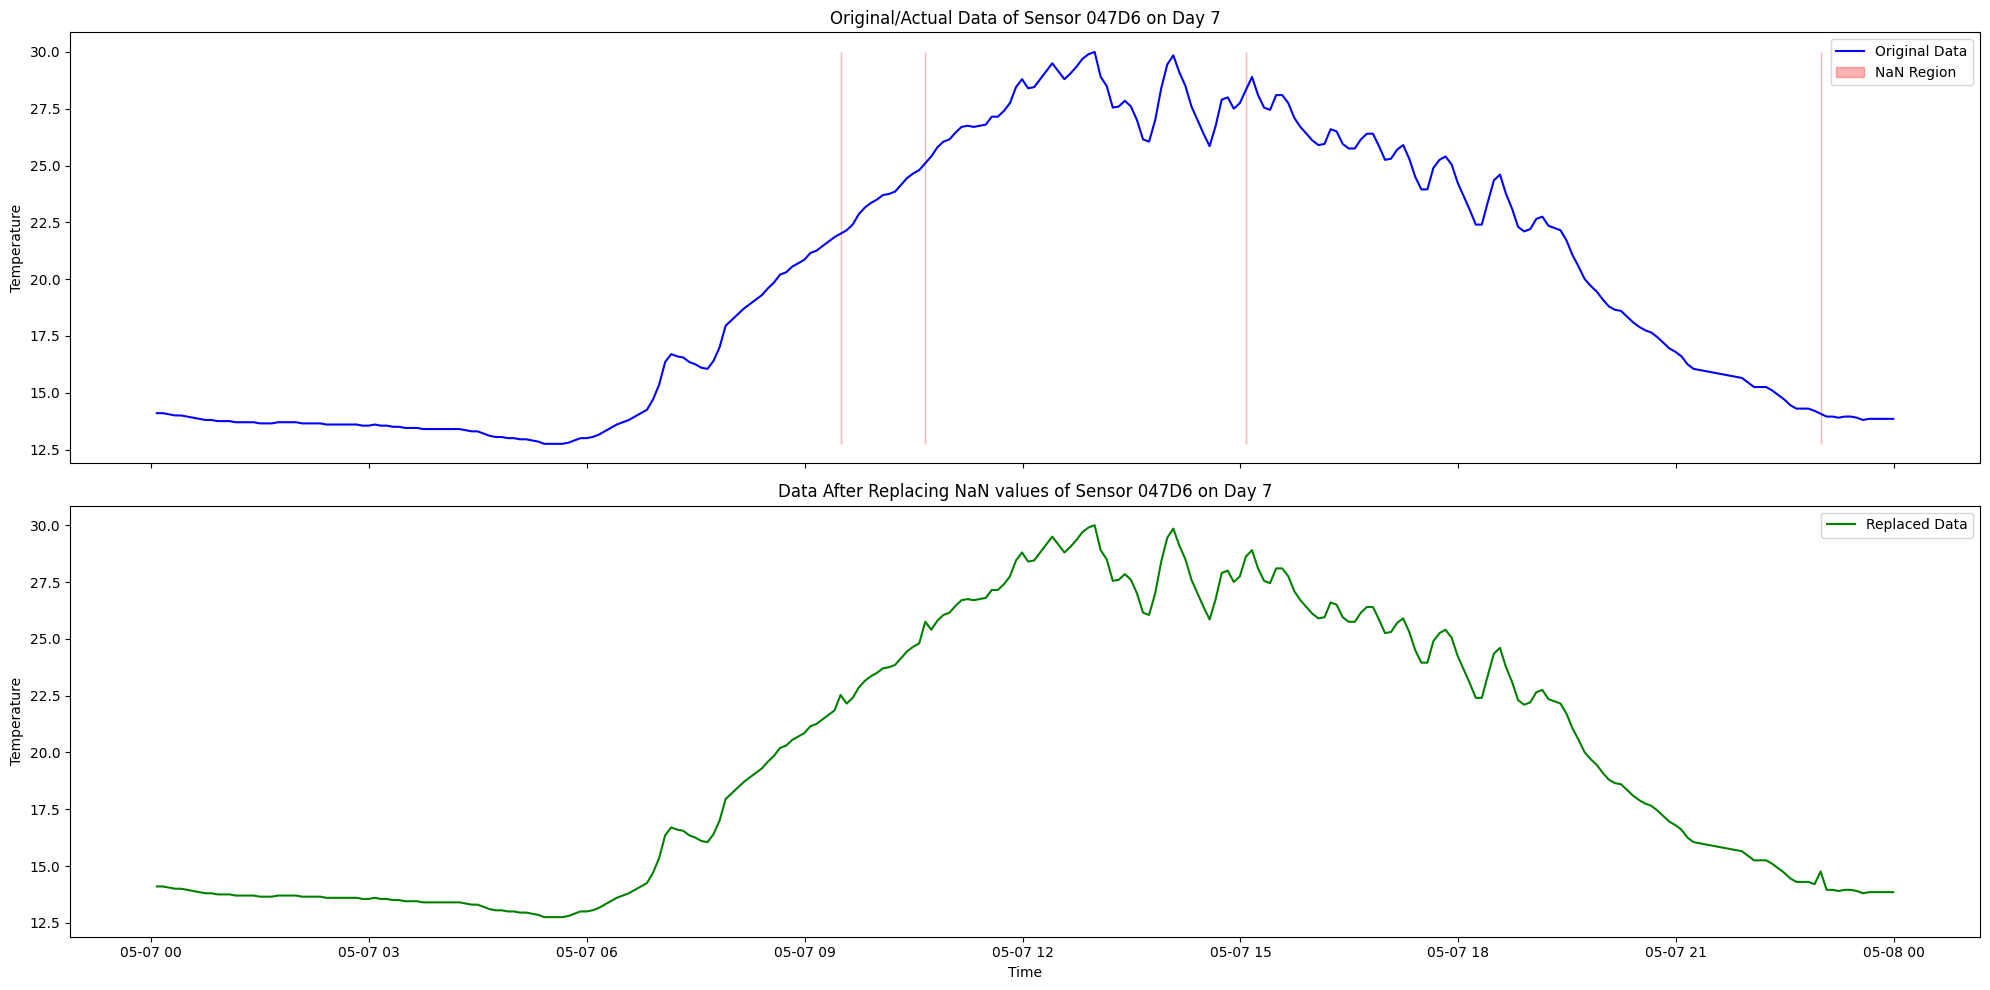

In [14]:
# Filter data for Sensor ID '047D6' and Day 7
sample_data = combined_data[combined_data['Sensor ID'] == '047D6']
sample_final_data = final_dataset[final_dataset['Sensor ID'] == '047D6']

Non_Empty_data = sample_data[sample_data['Day'] == 7]
final_days = sample_final_data[sample_final_data['Day'] == 7]

# Sort by 'Time'
Non_Empty_data = Non_Empty_data.sort_values(by='Time')
final_days = final_days.sort_values(by='Time')

# Identify NaN values
nan_mask = Non_Empty_data['Temperature'].isna()

# Set up the figure and axes
fig, axes = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# Plot the first DataFrame with shaded regions for NaNs
sns.lineplot(ax=axes[0], x='Time', y='Temperature', data=Non_Empty_data, color='blue', label='Original Data')

# Shading NaN regions - Masking Time where Temperature is NaN
axes[0].fill_between(Non_Empty_data['Time'], Non_Empty_data['Temperature'].min(), Non_Empty_data['Temperature'].max(), 
                     where=nan_mask, color='red', alpha=0.3, label='NaN Region')

axes[0].set_title('Original/Actual Data of Sensor 047D6 on Day 7')
axes[0].set_xlabel('')
axes[0].set_ylabel('Temperature')
axes[0].legend()

# Plot the second DataFrame (final data after replacing NaNs)
sns.lineplot(ax=axes[1], x='Time', y='Temperature', data=final_days, color='green', label='Replaced Data')
axes[1].set_title('Data After Replacing NaN values of Sensor 047D6 on Day 7')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Temperature')
axes[1].legend()

# Display the plots
plt.tight_layout()
plt.show()


In [15]:
# Display the first few rows of the dataset where missing values were flagged
final_dataset[final_dataset['flag'] == 1].head()

Time  Temperature  Humidity Sensor ID      Sensor Name  \
358  2024-05-05 05:01:20         9.64     84.50     047D6  047D6 T/RH IP67   
851  2024-05-20 08:31:34        14.33     84.66     047D6  047D6 T/RH IP67   
987  2024-05-07 09:29:43        22.53     59.60     047D6  047D6 T/RH IP67   
1001 2024-05-07 10:39:40        25.75     52.64     047D6  047D6 T/RH IP67   
1038 2024-05-20 15:01:20        30.95     45.32     047D6  047D6 T/RH IP67   

      Day Time_Instance  Year  Month  flag  
358     5      05:01:20  2024      5     1  
851    20      08:31:34  2024      5     1  
987     7      09:29:43  2024      5     1  
1001    7      10:39:40  2024      5     1  
1038   20      15:01:20  2024      5     1

#### Detecting anomalies

In [16]:
# Initialize lists for storing anomalies
anomalies_list = []
temperature_color = 'green'
humidity_color = 'blue'

# Detect anomalies for each sensor
for sensor_id, sensor_data in final_dataset.groupby('Sensor ID'):
    sensor_anomalies = anomaly_detection.detect_anomalies(sensor_data, sensor_id, temperature_color, humidity_color)
    anomalies_list.append(sensor_anomalies)

# Concatenate all detected anomalies into a single DataFrame
all_anomalies = pd.concat(anomalies_list)

##### Seperating anomalies and non anomalies out from the whole dataset

In [17]:
# Filter out non-anomalous data
non_anomalous_data = all_anomalies[(all_anomalies['Temperature_anomaly'] == 0) & (all_anomalies['Humidity_anomaly'] == 0)]

# Prepare data for training anomaly detection models
X_train = non_anomalous_data[['Temperature', 'Humidity']]
y_train_temp = non_anomalous_data['Temperature']
y_train_humidity = non_anomalous_data['Humidity']

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#### Tranining the Multi layer perceptron(MLP) model with non-anomalie data

In [18]:
# Train models for temperature and humidity anomaly detection
mlp_temp = anomaly_detection.training_anomaly_model(X_train_scaled, y_train_temp, '', 'temperature')

Epoch 1/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 11.6076 - val_loss: 5.7386e-04
Epoch 2/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 6s 990us/step - loss: 0.0019 - val_loss: 5.2624e-05
Epoch 3/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 6s 990us/step - loss: 0.0018 - val_loss: 8.2353e-04
Epoch 4/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 6s 996us/step - loss: 0.0016 - val_loss: 8.0402e-05
Epoch 5/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 6s 999us/step - loss: 0.0014 - val_loss: 1.8921e-04
Epoch 6/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 6s 994us/step - loss: 0.0011 - val_loss: 0.0188
Epoch 7/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 6s 995us/step - loss: 0.0013 - val_loss: 4.4390e-04
Epoch 8/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 6s 993us/step - loss: 0.0014 - val_loss: 4.6613e-05
Epoch 9/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 6s 996us/step - loss: 0.0013 - val_loss: 8.0309e-06
Epoch 10/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0011 - val_loss: 8.9968e-06
Epoch 11/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0

In [19]:
mlp_humidity = anomaly_detection.training_anomaly_model(X_train_scaled, '', y_train_humidity, 'humidity')

Epoch 1/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 7s 985us/step - loss: 249.6475 - val_loss: 0.0037
Epoch 2/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 6s 931us/step - loss: 0.0092 - val_loss: 9.7764e-04
Epoch 3/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 6s 929us/step - loss: 0.0104 - val_loss: 0.0029
Epoch 4/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 6s 934us/step - loss: 0.0099 - val_loss: 7.1290e-04
Epoch 5/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 6s 930us/step - loss: 0.0098 - val_loss: 0.1142
Epoch 6/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 6s 932us/step - loss: 0.0094 - val_loss: 0.0229
Epoch 7/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 6s 928us/step - loss: 0.0109 - val_loss: 0.0014
Epoch 8/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0094 - val_loss: 4.9911e-04
Epoch 9/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 6s 970us/step - loss: 0.0074 - val_loss: 4.8440e-04
Epoch 10/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 6s 972us/step - loss: 0.0081 - val_loss: 0.0453
Epoch 11/20
6176/6176 ━━━━━━━━━━━━━━━━━━━━ 6s 959us/step - loss: 0.0088 - val_loss:

#### Passing the anomali data to the trained MLP model and predicting the data and replacing them

In [20]:
# Filter anomalies and predict the corrected values
anomalies = all_anomalies[(all_anomalies['Temperature_anomaly'] == 1) & (all_anomalies['Humidity_anomaly'] == 1)].copy()

X_anomalies = anomalies[['Temperature', 'Humidity']]
X_anomalies_scaled = scaler.transform(X_anomalies)

anomalies.loc[anomalies['Temperature_anomaly'] == 1, 'Temperature'] = 0
anomalies.loc[anomalies['Humidity_anomaly'] == 1, 'Humidity'] = 0

In [21]:
anomalies['Temperature'] = np.round(mlp_temp.predict(X_anomalies_scaled), 2)
anomalies['Humidity'] = np.round(mlp_humidity.predict(X_anomalies_scaled), 2)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [22]:
# Update the dataset with the corrected values
all_anomalies.update(anomalies[['Temperature', 'Humidity']])
final_processed_data = all_anomalies.copy()

# final_anomalies = final_processed_data[(final_processed_data['Temperature_anomaly'] == 1) & (final_processed_data['Humidity_anomaly'] == 1)]

In [23]:
# Display the first few rows of the final dataset with anomalies
final_processed_data[(final_processed_data['Temperature_anomaly'] == 1) & (final_processed_data['Humidity_anomaly'] == 1)].head()

Time  Temperature   Humidity Sensor ID      Sensor Name  \
75823  2024-05-20 12:18:36    33.860001  31.030001     0474D  0474D T/RH IP67   
75873  2024-05-20 13:18:34    33.910000  29.209999     0474D  0474D T/RH IP67   
75877  2024-05-20 13:38:33    32.610001  28.620001     0474D  0474D T/RH IP67   
232588 2024-04-30 12:18:06    31.559999  34.000000     04750  04750 T/RH IP67   
232590 2024-04-30 12:28:04    31.610001  34.299999     04750  04750 T/RH IP67   

        Day Time_Instance  Year  Month  flag  Temperature_anomaly  \
75823    20      12:18:36  2024      5     0                    1   
75873    20      13:18:34  2024      5     0                    1   
75877    20      13:38:33  2024      5     0                    1   
232588   30      12:18:06  2024      4     0                    1   
232590   30      12:28:04  2024      4     0                    1   

        Humidity_anomaly  
75823                  1  
75873                  1  
75877                  1  
232588                 1  
232590                 1

##### Plotting the data after replacing with MLP for one day

In [24]:
# Identify the last day of the dataset and filter records for that day
lastday = final_processed_data['Time'].max().date()
last_day_records = final_processed_data[final_processed_data['Time'].dt.date == lastday]

# Filter the original sensor data for the last day
sensor_sample_data = combined_data[combined_data['Time'].dt.date == lastday]

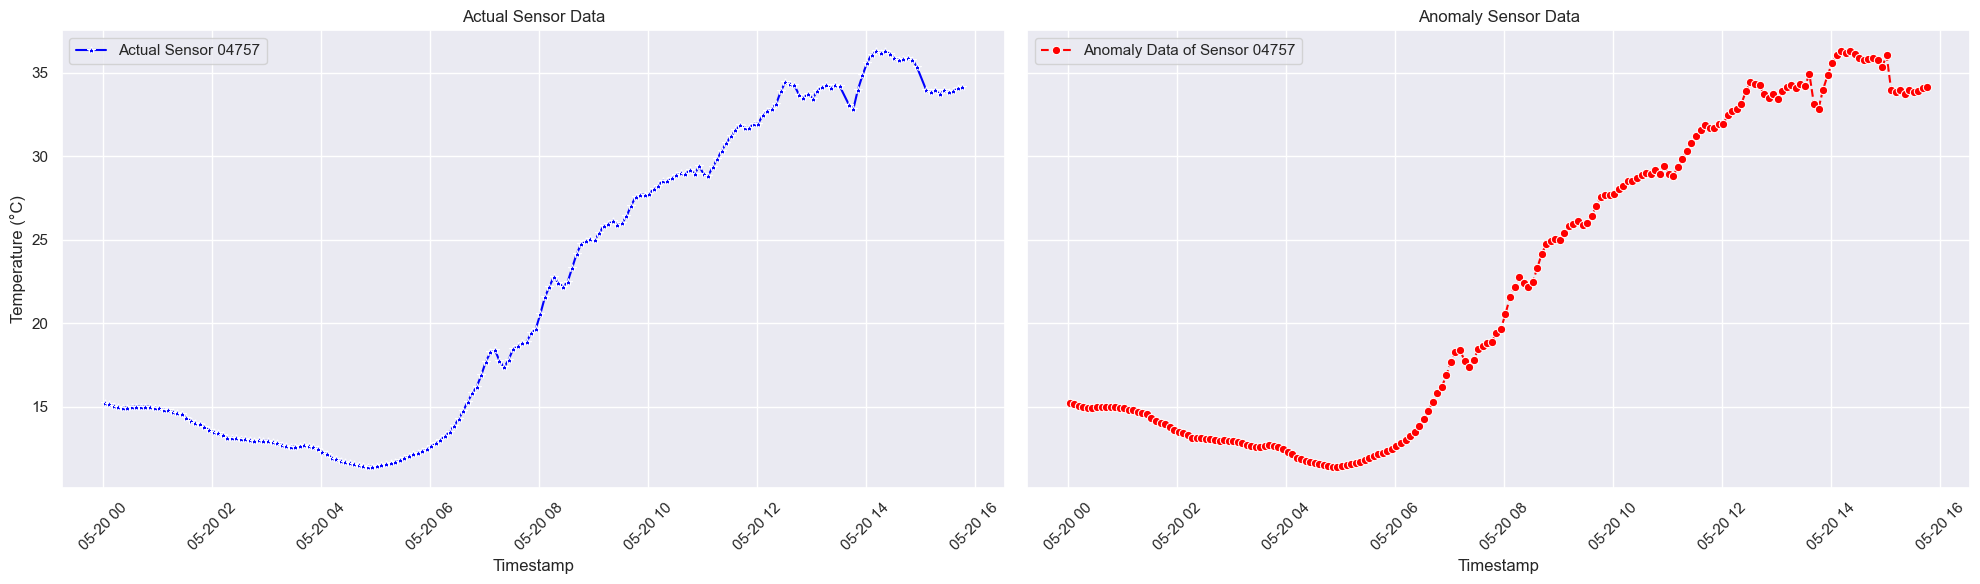

In [25]:
# Set style
sns.set(style="darkgrid")

# Create a figure with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Original data
sensor_data = sensor_sample_data[sensor_sample_data['Sensor ID'] == '04757']
sns.lineplot(ax=axs[0], x='Time', y='Temperature', data=sensor_data, 
             marker='*', color='blue',
             label='Actual Sensor 04757')

# Filtered data
filtered_sensor_data = last_day_records[last_day_records['Sensor ID'] == '04757']
sns.lineplot(ax=axs[1], x='Time', y='Temperature', data=filtered_sensor_data, 
             marker='o', color='red',
             linestyle='--', label='Anomaly Data of Sensor 04757')

# Titles and labels
axs[0].set_title('Actual Sensor Data')
axs[1].set_title('Anomaly Sensor Data')

for ax in axs:
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Temperature (°C)')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Compare/original_and_filtered_plots_side_by_side.png')
plt.show()

### Saving the data as .csv after gathering and cleaning the data and using it for Power BI visualization

In [26]:
# Save the final processed data to a CSV file
final_processed_data.to_csv('Combined_Data.csv', index=False)

In [27]:
final_dataset.columns

Index(['Time', 'Temperature', 'Humidity', 'Sensor ID', 'Sensor Name', 'Day',
       'Time_Instance', 'Year', 'Month', 'flag'],
      dtype='object')

### Heatmap Generation

#### Temperature Heatmap Generation

In [28]:
# Generate heatmap videos for Temperature and Humidity
placement.heatmap_video_gen(final_processed_data, output_dir, video_output, 'Temperature')

'Successfully generated the heatmap video.'

#### Humidity Heatmap Generation

In [29]:
placement.heatmap_video_gen(final_processed_data, 'sensor_heatmaps/humidity', 'sensor_heatmaps_humidity_video.avi', 'Humidity')

'Successfully generated the heatmap video.'

### Applying Fast Fourier Transform(FFT)

#### Temeprature

In [30]:
# Read temperature hatmap video
temp_video_file_path = 'sensor_heatmaps_temperature_video.avi'

##### Plotting the FFT

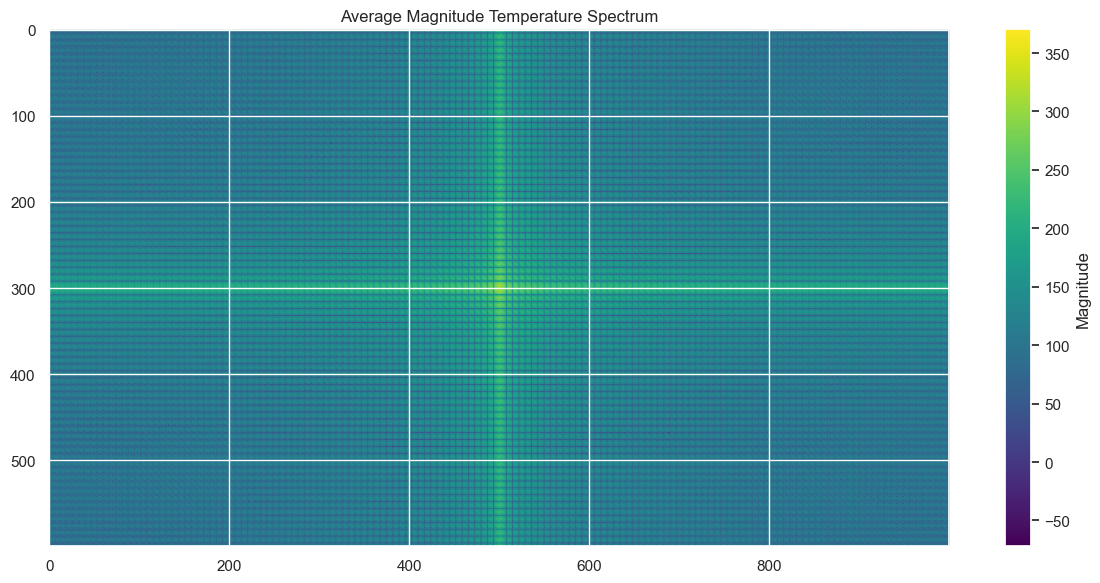

In [31]:
# Process the video and compute average FFT
fft_avg, magnitude_spectrum_avg = nyquist_throrm.process_video_fft_average(temp_video_file_path)

# Plot the average FFT signal and its magnitude spectrum
plt.figure(figsize=(12, 6))

# Compute the frequency values for the x-axis
freq_values = np.fft.fftfreq(fft_avg.shape[0])

plt.imshow(magnitude_spectrum_avg, cmap='viridis', aspect='auto')
plt.title('Average Magnitude Temperature Spectrum')
plt.colorbar(label='Magnitude')
plt.axis('on')

plt.tight_layout()
plt.show()

### Applying Shannon Nyquist

#### calling necessary functions that performs Shannon Nyquist theorm on the temperature video

In [32]:
frame_count, width, height = nyquist_throrm.get_video_info(temp_video_file_path)
video_data = nyquist_throrm.read_video_file(temp_video_file_path)
results_step_1 = nyquist_throrm.reading_video(frame_count, width, height, video_data)

In [33]:
results_step_1

{'fft_data': array([[[ 9.75527516e+10-0.00000000e+00j,
           1.11691164e+09-2.34577298e+08j,
           9.48707518e+08-2.06943110e+09j, ...,
          -2.05814161e+09-9.87510555e+08j,
           9.48707518e+08+2.06943110e+09j,
           1.11691164e+09+2.34577298e+08j],
         [-5.48309781e+08-1.77652117e+09j,
          -4.66452095e+09-2.84568700e+07j,
          -1.49356085e+07-1.83432606e+09j, ...,
          -1.77976008e+09-3.07167329e+08j,
           2.70726232e+09-7.32821789e+08j,
           2.18636337e+09-7.80666803e+08j],
         [ 1.50517165e+09+1.18688409e+09j,
           4.19272803e+09-1.06921941e+09j,
          -1.28723473e+08+2.14186940e+09j, ...,
          -8.11145810e+06+7.06603592e+08j,
           1.21084950e+09+1.26537312e+09j,
          -1.51014049e+09+8.62188530e+08j],
         ...,
         [-6.26255234e+08+5.97609968e+09j,
          -1.58591068e+09-4.22520698e+09j,
          -1.81409830e+09+2.69261395e+08j, ...,
           3.37626782e+09+6.98129458e+08j,
     

##### Plotting the results of Shannon Nyquist results of Temperature

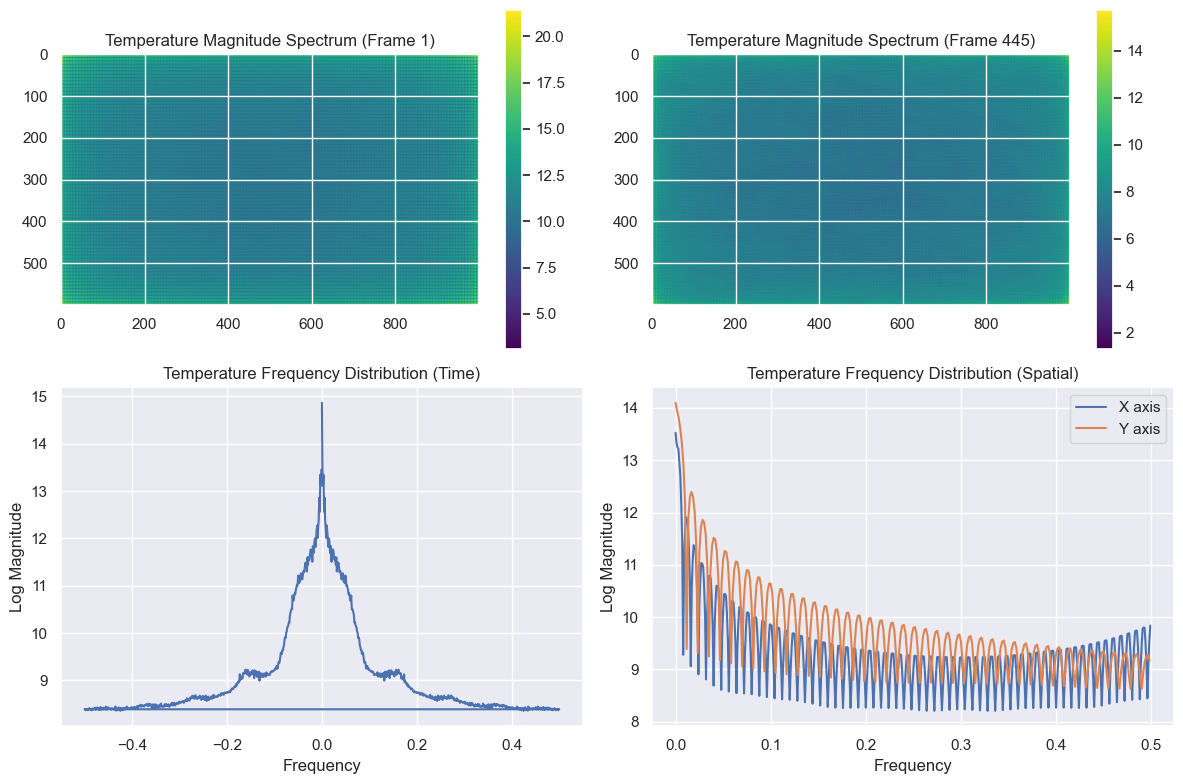

In [34]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(np.log1p(results_step_1['magnitude_spectrum'][1]), cmap='viridis')
plt.title("Temperature Magnitude Spectrum (Frame 1)")
plt.colorbar()

middle_frame = frame_count // 2
plt.subplot(2, 2, 2)
plt.imshow(np.log1p(results_step_1['magnitude_spectrum'][middle_frame]), cmap='viridis')
plt.title(f"Temperature Magnitude Spectrum (Frame {middle_frame})")
plt.colorbar()

plt.subplot(2, 2, 3)
plt.plot(results_step_1['frequencies_time'], np.log1p(np.mean(results_step_1['magnitude_spectrum'], axis=(1, 2))))
plt.title("Temperature Frequency Distribution (Time)")
plt.xlabel("Frequency")
plt.ylabel("Log Magnitude")

plt.subplot(2, 2, 4)
plt.plot(results_step_1['frequencies_x'][:width//2], np.log1p(np.mean(results_step_1['magnitude_spectrum'], axis=(0, 2))[:width//2]), label='X axis')
plt.plot(results_step_1['frequencies_y'][:height//2], np.log1p(np.mean(results_step_1['magnitude_spectrum'], axis=(0, 1))[:height//2]), label='Y axis')
plt.title("Temperature Frequency Distribution (Spatial)")
plt.xlabel("Frequency")
plt.ylabel("Log Magnitude")
plt.legend()

plt.tight_layout()
plt.show()


#### Reading the sensor positions

In [35]:
# Load sensor placement data
with open('sensor_placement.json', 'r') as file:
    sensor_placement = json.load(file)

# Convert lists to tuples and create reverse lookup dictionary
sensor_reverse_lookup = {tuple(v): k for k, v in sensor_placement.items()}

### Applying Proper Orthogonal Decomposition and Data-Driven QR sparse sensing for Temperature

In [36]:
# Assuming fft_data is loaded from results_step_1["fft_data"]
fft_data = results_step_1["magnitude_spectrum"]

# Check the shape of fft_data
print(f"fft_data shape: {fft_data.shape}")

data_matrix = np.reshape(fft_data, (fft_data.shape[0], -1))

# Verify the reshaped data matrix
print(f"data_matrix shape: {data_matrix.shape}")

# Apply Proper Orthogonal Decomposition (POD) using SVD
U, S, Vt = svd(data_matrix, full_matrices=False)

# Calculate cumulative explained variance
explained_variance = np.cumsum(S) / np.sum(S)

# Determine the number of modes needed to reach the desired explained variance
desired_variance = 0.925 # 925% explained variance
num_modes = np.searchsorted(explained_variance, desired_variance) + 1

# Select a subset of modes
reduced_data = U[:, :num_modes] @ np.diag(S[:num_modes])

# Perform QR decomposition with column pivoting on reduced data
Q, R, P = qr(reduced_data.T, pivoting=True)

num_sensors = num_modes
selected_sensors_indices = P[:num_sensors]

selected_sensors = []
grid_rows, grid_cols = 8, 7
grid_size = grid_rows * grid_cols

# Identify the selected sensors from indices
for idx in selected_sensors_indices:
    rem = idx % grid_size
    x, y = divmod(rem, grid_cols)
    sensor_id = sensor_reverse_lookup.get((grid_rows - x, y + 1))
    selected_sensors.append([grid_rows - x, y + 1])

print("Selected sensor locations (row, column):", selected_sensors)

fft_data shape: (891, 600, 1000)
data_matrix shape: (891, 600000)
Selected sensor locations (row, column): [[8, 1], [1, 2], [8, 2], [2, 7], [8, 4], [8, 3], [1, 1], [2, 5], [8, 6], [2, 6], [8, 5], [2, 4], [8, 7], [7, 1], [2, 3], [7, 3], [2, 1], [2, 2], [7, 2], [3, 7], [7, 4], [7, 7], [7, 5], [3, 6], [4, 3], [4, 7], [5, 1], [3, 1], [6, 4], [6, 2], [3, 4], [3, 2], [5, 3], [4, 1]]


#### Humidity

##### reading humidity heatmap video

In [37]:
humidity_video_file_path = 'sensor_heatmaps_humidity_video.avi'

##### Plotting the Fast fourier transform(FFT) on humidity

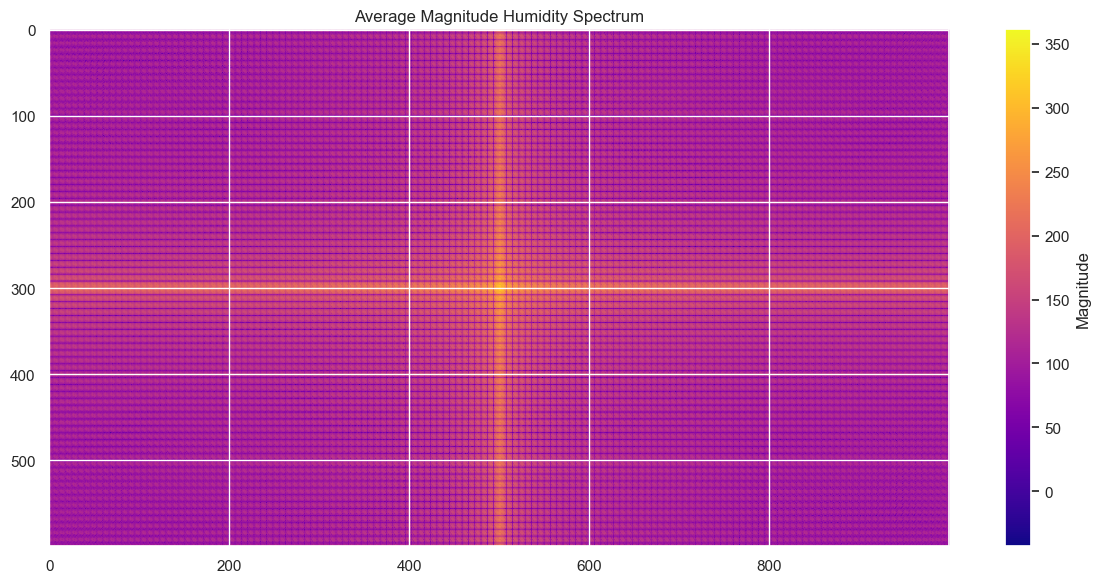

In [38]:
# Process the video and compute average FFT
fft_humid_avg, magnitude_humid_spectrum_avg = nyquist_throrm.process_video_fft_average(humidity_video_file_path)

# Plot the average FFT signal and its magnitude spectrum
plt.figure(figsize=(12, 6))

# Compute the frequency values for the x-axis
freq_humid_values = np.fft.fftfreq(fft_humid_avg.shape[0])

plt.imshow(magnitude_humid_spectrum_avg, cmap='plasma', aspect='auto')
plt.title('Average Magnitude Humidity Spectrum')
plt.colorbar(label='Magnitude')
plt.axis('on')

plt.tight_layout()
plt.show()

### Applying Shannon Nyquist

#### calling necessary functions that performs Shannon Nyquist theorm on the humidity video

In [39]:
humid_frame_count, humid_width, humid_height = nyquist_throrm.get_video_info(humidity_video_file_path)
humid_video_data = nyquist_throrm.read_video_file(humidity_video_file_path)
humid_results_step_1 = nyquist_throrm.reading_video(humid_frame_count, humid_width, humid_height, humid_video_data)

In [40]:
humid_results_step_1

{'fft_data': array([[[ 6.27318180e+10-0.00000000e+00j,
          -6.35124461e+08-1.84814425e+09j,
          -3.34781961e+07+1.27715105e+09j, ...,
           2.25509196e+09+2.94233239e+09j,
          -3.34781961e+07-1.27715105e+09j,
          -6.35124461e+08+1.84814425e+09j],
         [-2.43044056e+08+2.99052056e+09j,
           3.76876569e+09-7.21432289e+08j,
           5.76465363e+07+3.47335888e+09j, ...,
           1.44171946e+09-2.93248765e+08j,
          -6.47376640e+08+3.34416285e+09j,
          -4.04821347e+09-2.18824966e+08j],
         [-2.14797388e+09+4.52299304e+08j,
          -6.24981563e+09+2.32937648e+09j,
           1.05521230e+08-1.06659051e+09j, ...,
          -9.22138147e+08-1.11899514e+09j,
          -6.47546831e+08-3.63163371e+08j,
           3.20649652e+09-3.78497855e+09j],
         ...,
         [ 1.81222064e+09-6.85845373e+09j,
          -1.62880615e+08+3.95847344e+09j,
           1.13246440e+09-6.97442656e+08j, ...,
          -2.79364463e+09+3.06966219e+08j,
     

##### Plotting the results of Shannon Nyquist results of Humidity

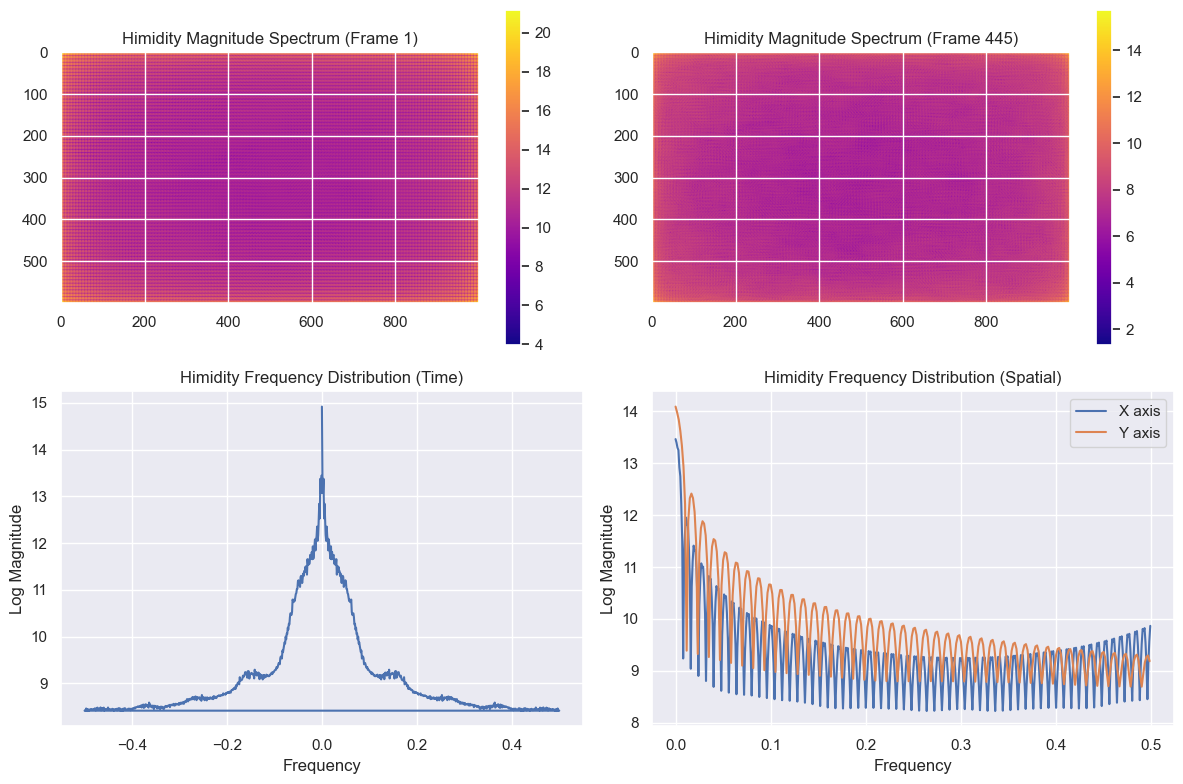

In [41]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(np.log1p(humid_results_step_1['magnitude_spectrum'][1]), cmap='plasma')
plt.title("Himidity Magnitude Spectrum (Frame 1)")
plt.colorbar()

middle_frame = humid_frame_count // 2
plt.subplot(2, 2, 2)
plt.imshow(np.log1p(humid_results_step_1['magnitude_spectrum'][middle_frame]), cmap='plasma')
plt.title(f"Himidity Magnitude Spectrum (Frame {middle_frame})")
plt.colorbar()

plt.subplot(2, 2, 3)
plt.plot(humid_results_step_1['frequencies_time'], np.log1p(np.mean(humid_results_step_1['magnitude_spectrum'], axis=(1, 2))))
plt.title("Himidity Frequency Distribution (Time)")
plt.xlabel("Frequency")
plt.ylabel("Log Magnitude")

plt.subplot(2, 2, 4)
plt.plot(humid_results_step_1['frequencies_x'][:humid_width//2], np.log1p(np.mean(humid_results_step_1['magnitude_spectrum'], axis=(0, 2))[:humid_width//2]), label='X axis')
plt.plot(humid_results_step_1['frequencies_y'][:humid_height//2], np.log1p(np.mean(humid_results_step_1['magnitude_spectrum'], axis=(0, 1))[:humid_height//2]), label='Y axis')
plt.title("Himidity Frequency Distribution (Spatial)")
plt.xlabel("Frequency")
plt.ylabel("Log Magnitude")
plt.legend()

plt.tight_layout()
plt.show()


### Applying Proper Orthogonal Decomposition and Data-Driven QR sparse sensing for humidity

In [42]:
# Assuming fft_data is loaded from results_step_1["fft_data"]
fft_humid_data = humid_results_step_1["magnitude_spectrum"]

# Check the shape of fft_data
print(f"humid_fft_data shape: {fft_humid_data.shape}")

humid_data_matrix = np.reshape(fft_humid_data, (fft_humid_data.shape[0], -1))

# Verify the reshaped data matrix
print(f"humid data_matrix shape: {humid_data_matrix.shape}")
# Apply Proper Orthogonal Decomposition (POD) using SVD

humid_U, humid_S, himid_Vt = svd(humid_data_matrix, full_matrices=False)
# Calculate cumulative explained variance
humid_explained_variance = np.cumsum(humid_S) / np.sum(humid_S)

# Determine the number of modes needed to reach the desired explained variance
humid_desired_variance = 0.925 # 92.5% explained variance
humid_num_modes = np.searchsorted(humid_explained_variance, humid_desired_variance) + 1

# Select a subset of modes
humid_reduced_data = humid_U[:, :humid_num_modes] @ np.diag(humid_S[:humid_num_modes])

# Perform QR decomposition with column pivoting on reduced data
Q, R, P = qr(humid_reduced_data.T, pivoting=True)

humid_num_sensors = humid_num_modes
selected_humid_sensors_indices = P[:humid_num_sensors]

selected_humid_sensors = []
grid_rows, grid_cols = 8, 7
grid_size = grid_rows * grid_cols

# Identify the selected sensors from indices
for idx in selected_humid_sensors_indices:
    rem = idx % grid_size
    x, y = divmod(rem, grid_cols)
    sensor_id = sensor_reverse_lookup.get((grid_rows - x, y + 1))
    selected_humid_sensors.append([grid_rows - x, y + 1])

print("Selected sensor locations (row, column):", selected_humid_sensors)

humid_fft_data shape: (891, 600, 1000)
humid data_matrix shape: (891, 600000)
Selected sensor locations (row, column): [[8, 1], [8, 4], [8, 2], [2, 7], [1, 2], [1, 1], [8, 3], [2, 5], [8, 6], [2, 6], [8, 5], [8, 7], [2, 4], [7, 1], [2, 3], [7, 3], [2, 1], [3, 7], [7, 4], [7, 2], [2, 2], [3, 6], [6, 6], [5, 2], [4, 5], [4, 2], [7, 5], [4, 3], [5, 5], [5, 1], [4, 7], [4, 6], [6, 4], [5, 6], [4, 1], [5, 7], [3, 1], [6, 5], [6, 1]]


### Extracting Common Sensors

In [43]:
# Convert lists to sets
humid_set = set(map(tuple, selected_humid_sensors))
temp_set = set(map(tuple, selected_sensors))
# Find common sensors
common_sensors_set = humid_set.intersection(temp_set)
# Convert common sensors back to a list (if needed)
common_sensors = list(map(list, common_sensors_set))

# common_sensors.append([1,7])
# common_sensors.append([1,4])

#### Plotting the selected sensor postions by comparing the side-by-side

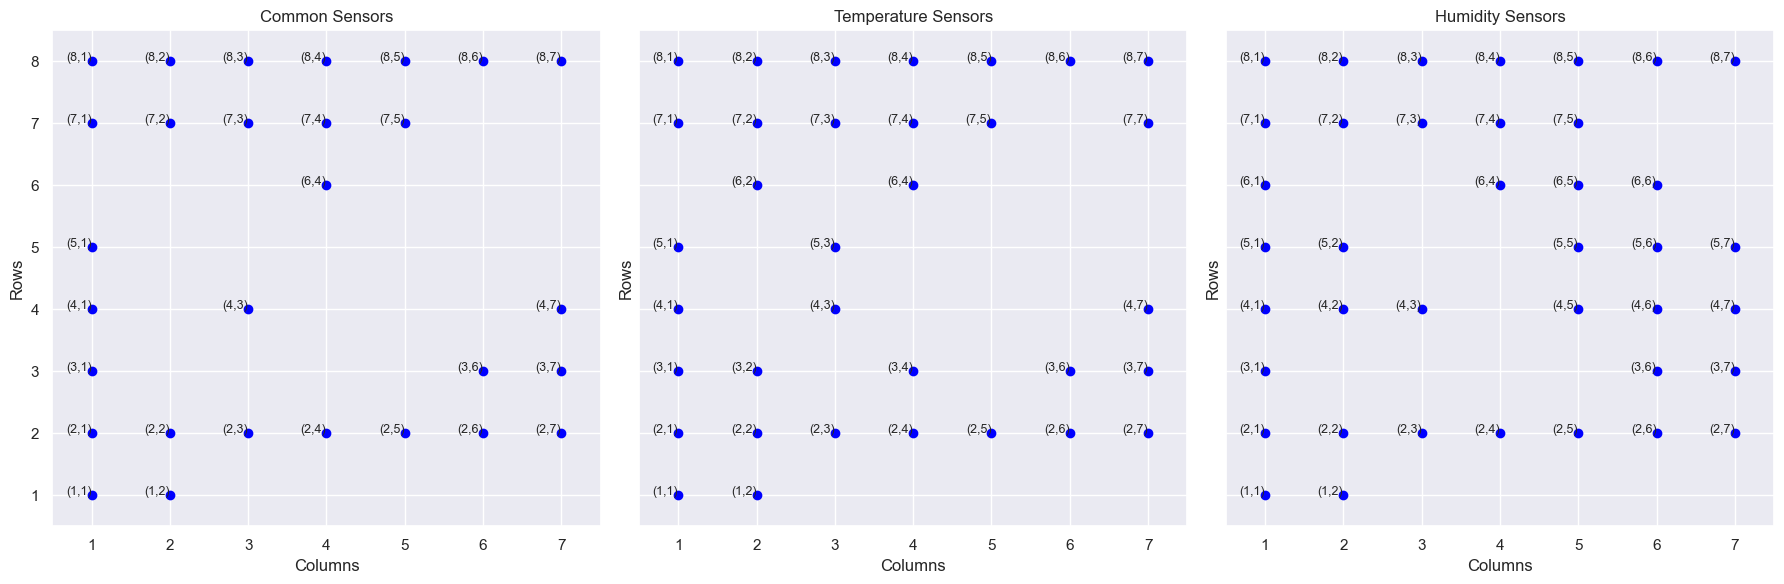

In [44]:
# Create a grid plot with three subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for common sensors (inverted to the first position)
axes[0].grid(True)
axes[0].set_xticks(range(1, 8))
axes[0].set_yticks(range(1, 9))
axes[0].set_xlim(0.5, 7.5)
axes[0].set_ylim(8.5, 0.5)  # Invert y-axis: 8.5 at top, 0.5 at bottom
for (row, col) in common_sensors:
    axes[0].scatter(col, row, c='blue')
    axes[0].text(col, row, f'({row},{col})', fontsize=9, ha='right')
axes[0].invert_yaxis()
axes[0].set_title("Common Sensors")
axes[0].set_xlabel("Columns")
axes[0].set_ylabel("Rows")

# Plot for temperature sensors (inverted to the second position)
axes[1].grid(True)
axes[1].set_xticks(range(1, 8))
axes[1].set_yticks(range(1, 9))
axes[1].set_xlim(0.5, 7.5)
axes[1].set_ylim(8.5, 0.5)  # Invert y-axis: 8.5 at top, 0.5 at bottom
for (row, col) in selected_sensors:
    axes[1].scatter(col, row, c='blue')
    axes[1].text(col, row, f'({row},{col})', fontsize=9, ha='right')
axes[1].invert_yaxis()
axes[1].set_title("Temperature Sensors")
axes[1].set_xlabel("Columns")
axes[1].set_ylabel("Rows")

# Plot for humidity sensors (inverted to the third position)
axes[2].grid(True)
axes[2].set_xticks(range(1, 8))
axes[2].set_yticks(range(1, 9))
axes[2].set_xlim(0.5, 7.5)
axes[2].set_ylim(8.5, 0.5)  # Invert y-axis: 8.5 at top, 0.5 at bottom
for (row, col) in selected_humid_sensors:
    axes[2].scatter(col, row, c='blue')
    axes[2].text(col, row, f'({row},{col})', fontsize=9, ha='right')
axes[2].invert_yaxis()
axes[2].set_title("Humidity Sensors")
axes[2].set_xlabel("Columns")
axes[2].set_ylabel("Rows")

# Display the plot
plt.tight_layout()
plt.show()

### Re-Generating the Heatmaps with Reduced Sensors

#### Extracting the information from the saved and cleaned dataset

In [45]:
with open('sensor_placement.json','r') as sensor:
    data = json.load(sensor)

selected_sensors_list = [key for key, value in data.items() if value in common_sensors]
reduced_sensor_data = pd.read_csv('Combined_Data.csv')
not_selected_sensors_list = [key for key, value in data.items() if value not in common_sensors]
not_reduced_sensor_data = reduced_sensor_data[reduced_sensor_data['Sensor ID'].isin(not_selected_sensors_list)]
reduced_sensors = reduced_sensor_data[reduced_sensor_data['Sensor ID'].isin(selected_sensors_list)]

### Testing the positions with neural networks

#### Extracting last one months data from both reduced and original datasets

##### Last one months data with complete sensors info

In [46]:
# Convert 'Time' column to datetime
reduced_sensor_data.loc[:, 'Time'] = pd.to_datetime(reduced_sensor_data['Time'])

# Get the latest date in the dataset
latest_date = reduced_sensor_data['Time'].max()

# Extract the latest month and year
latest_month = latest_date.month
latest_year = latest_date.year

# Filter the DataFrame for the latest month and year
latest_month_data_1 = reduced_sensor_data[(reduced_sensor_data['Year'] == latest_year) & (reduced_sensor_data['Month'] == latest_month)]


sample_dataset_1 = latest_month_data_1.groupby('Sensor ID', observed=False).apply(lambda x: x.tail(10000)).reset_index(drop=True)

# Use .loc to avoid SettingWithCopyWarning
sample_dataset_1['Sensor ID'] = pd.Categorical(sample_dataset_1['Sensor ID'], categories=list(data.keys()), ordered=True)
reduced_df_sorted_1 = sample_dataset_1.sort_values(by='Sensor ID')
reduced_df_sorted_1 = reduced_df_sorted_1[~pd.isna(reduced_df_sorted_1['Sensor ID'])]
reduced_df_sorted_1.loc[:, 'Sensor ID'] = reduced_df_sorted_1['Sensor ID'].astype(str)
reduced_df_sorted_1.reset_index(drop=True, inplace=True)

C:\Users\malla\AppData\Local\Temp\ipykernel_20512\1022417582.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_dataset_1 = latest_month_data_1.groupby('Sensor ID', observed=False).apply(lambda x: x.tail(10000)).reset_index(drop=True)


##### Last one months data with reduced sensors info

In [47]:
# Convert 'Time' column to datetime
reduced_sensors.loc[:, 'Time'] = pd.to_datetime(reduced_sensors['Time'])

# Get the latest date in the dataset
latest_date = reduced_sensors['Time'].max()

# Extract the latest month and year
latest_month = latest_date.month
latest_year = latest_date.year

# Filter the DataFrame for the latest month and year
latest_month_data = reduced_sensors[(reduced_sensors['Year'] == latest_year) & (reduced_sensors['Month'] == latest_month)]

sample_dataset = latest_month_data.groupby('Sensor ID', observed=False).apply(lambda x: x.tail(10000)).reset_index(drop=True)

# Use .loc to avoid SettingWithCopyWarning
sample_dataset['Sensor ID'] = pd.Categorical(sample_dataset['Sensor ID'], categories=selected_sensors_list, ordered=True)
reduced_df_sorted = sample_dataset.sort_values(by='Sensor ID')
reduced_df_sorted = reduced_df_sorted[~pd.isna(reduced_df_sorted['Sensor ID'])]
reduced_df_sorted.loc[:, 'Sensor ID'] = reduced_df_sorted['Sensor ID'].astype(str)
reduced_df_sorted.reset_index(drop=True, inplace=True)

C:\Users\malla\AppData\Local\Temp\ipykernel_20512\2484819331.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_dataset = latest_month_data.groupby('Sensor ID', observed=False).apply(lambda x: x.tail(10000)).reset_index(drop=True)


### Predicting Temperature

#### Splitting the data into x and y where x->reduced sensors data y->complete sensors data

In [48]:
x_temp, y_temp = Alternative_filling_method.standerdizing_data(reduced_df_sorted,reduced_df_sorted_1,'Temperature')

x_temp = Alternative_filling_method.shuffle_data(x_temp)
y_temp = Alternative_filling_method.shuffle_data(y_temp)

#### Splitting the x and y into test, train and validate

In [49]:

# Split the data into 70% training+validation and 30% test set
x_temp_train_val, x_temp_test, y_temp_train_val, y_temp_test = train_test_split(x_temp, y_temp, test_size=0.3, random_state=0)

# Now split the training+validation set into 70% training and 30% validation set
x_temp_train, x_temp_val, y_temp_train, y_temp_val = train_test_split(x_temp_train_val, y_temp_train_val, test_size=0.3, random_state=0)

#### Generating the model with x and y data inputs and outputs

In [50]:
predicting_temp_model = Alternative_filling_method.neural_network_model(x_temp, y_temp)

In [51]:
predicting_temp_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 29)             │           870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 29)             │           116 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 29)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 56)             │         1,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 56)             │           224 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 56)             │         3,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56)             │           224 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 56)             │         3,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 56)             │           224 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 56)             │         3,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56)             │           224 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 56)             │         3,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56)             │           224 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 56)             │         3,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56)             │           224 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 400,714 (1.53 MB)

 Trainable params: 395,728 (1.51 MB)

 Non-trainable params: 4,986 (19.48 KB)

#### Training the above model with train and validating with validate data

In [52]:
history_temp = predicting_temp_model.fit(x_temp_train, y_temp_train, epochs=100, batch_size=16, validation_data=(x_temp_val, y_temp_val))

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - loss: 410.7224 - val_loss: 392.6161
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 308.8939 - val_loss: 286.8854
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 224.4575 - val_loss: 189.2600
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 160.4087 - val_loss: 149.6938
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 119.0557 - val_loss: 128.8999
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 93.9170 - val_loss: 119.5574
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 80.2129 - val_loss: 115.3016
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 74.8680 - val_loss: 121.7558
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 72.8496 - val_loss: 116.2994
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 71.9234 - val_loss: 123.2284
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 71.6734 - val_loss: 

#### testing the model with test data

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 172.6635
Model Loss on Test Dataset: 158.95314025878906


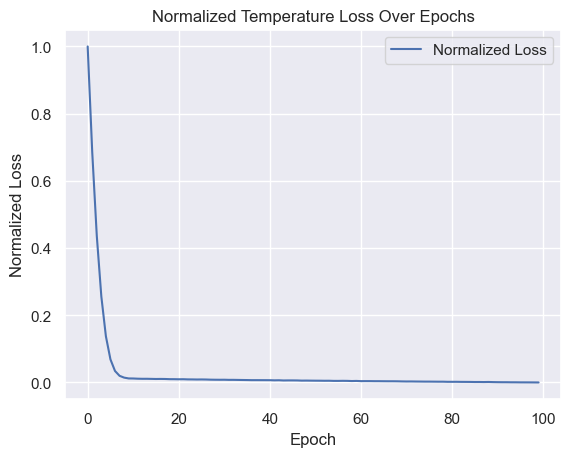

In [53]:
loss_temp = predicting_temp_model.evaluate(x_temp_test, y_temp_test)
print(f"Model Loss on Test Dataset: {loss_temp}")
# Assuming `history.history['loss']` contains your loss values
loss_temp_values = history_temp.history['loss']

# Normalize the loss values
min_temp_loss = np.min(loss_temp_values)
max_temp_loss = np.max(loss_temp_values)
normalized_temp_loss = (loss_temp_values - min_temp_loss) / (max_temp_loss - min_temp_loss)

# Plot the normalized loss values
plt.plot(normalized_temp_loss, label='Normalized Loss')
plt.xlabel('Epoch')
plt.ylabel('Normalized Loss')
plt.title('Normalized Temperature Loss Over Epochs')
plt.legend()
plt.show()

### Calcuating the Error for the Error rate for temperature

In [54]:
predictions_temp_over_time = Alternative_filling_method.predict_future_temperatures(predicting_temp_model, reduced_df_sorted, reduced_df_sorted_1, selected_sensors_list, 'Temperature', num_steps=102)
predictions_temp_over_time = pd.concat(predictions_temp_over_time,ignore_index=True)
predictions_temp_over_time['error_temperature'] = np.abs(predictions_temp_over_time['Predicted_Temperature'] - predictions_temp_over_time['Actual_Temperature'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━

#### Generating Error heatmap video for Temperature

In [55]:
error_temp_toutput_dir = 'error_frames/temperature'
error_temp_frames = Alternative_filling_method.error_plotting(error_temp_toutput_dir,predictions_temp_over_time,'error_temperature', True)
reconstrucing_video.video_generation(error_temp_frames,'Error_temp_video.avi')

'Video saved as: Error_temp_video.avi'

#### Re-Construcing the heatmap video with reduced number of sensors

In [56]:
temp_output_dir = 'reconstructed_heatmaps/temperature'
predicted_temp_frames = Alternative_filling_method.error_plotting(temp_output_dir,predictions_temp_over_time,'Predicted_Temperature', False)
reconstrucing_video.video_generation(predicted_temp_frames,'reconstructed_temp_heatmapvideo.avi')

'Video saved as: reconstructed_temp_heatmapvideo.avi'

#### Calculating Similarit Score for temperature heatmap videos

In [57]:
# Paths to your video files
video1_path = 'reconstructed_temp_heatmapvideo.avi'
video2_path = 'sensor_heatmaps_temperature_video.avi'

# Extract frames
video1_frames = testing_videos.extract_frames(video1_path)
video2_frames = testing_videos.extract_frames(video2_path)

# Compare videos
similarity_scores = testing_videos.compare_videos(video1_frames, video2_frames)

# Compute overall similarity
overall_score = testing_videos.overall_similarity(similarity_scores)

# Perform statistical tests
statistical_results = testing_videos.perform_statistical_tests(similarity_scores)

print(f"Overall similarity score for Temperature: {overall_score}")
print(f"T-test: T-statistic for Temperature = {statistical_results['t-test'][0]}, P-value = {statistical_results['t-test'][1]}")
print(f"Wilcoxon signed-rank test for Temperature: Statistic = {statistical_results['Wilcoxon signed-rank test'][0]}, P-value = {statistical_results['Wilcoxon signed-rank test'][1]}")
print(f"Kolmogorov-Smirnov test for Temperature: Statistic = {statistical_results['Kolmogorov-Smirnov test'][0]}, P-value = {statistical_results['Kolmogorov-Smirnov test'][1]}")


Overall similarity score for Temperature: 0.7727489212029672
T-test: T-statistic for Temperature = 830.8868691862023, P-value = 0.0
Wilcoxon signed-rank test for Temperature: Statistic = 191522.0, P-value = 0.3507015597957235
Kolmogorov-Smirnov test for Temperature: Statistic = 0.05872849000594427, P-value = 0.004105581777876965


#### Predicting Humidity

#### Splitting the data into x and y where x->reduced sensors data y->complete sensors data of Humitiy

In [76]:
x_humid, y_humid = Alternative_filling_method.standerdizing_data(reduced_df_sorted,reduced_df_sorted_1,'Humidity')

x_humid = Alternative_filling_method.shuffle_data(x_humid)
y_humid = Alternative_filling_method.shuffle_data(y_humid)

In [77]:
x_humid

array([[73.7, 79.5, 80.6, ..., 84.1, 76.7, 80.9],
       [80.2, 68.3, 77. , ..., 78.7, 38.8, 85.2],
       [74. , 50.5, 87.6, ..., 68.5, 73.3, 87.9],
       ...,
       [32.7, 39.3, 77.7, ..., 50.3, 59.8, 84.5],
       [86.1, 82.9, 89.2, ..., 52.8, 79.7, 67.4],
       [69.2, 46.8, 81.8, ..., 38.4, 39.2, 68.9]])

#### Splitting the x and y into test, train and validate and generating the model with x and y data

In [78]:
# Split the data into 70% training+validation and 30% test set
x_humid_train_val, x_humid_test, y_humid_train_val, y_humid_test = train_test_split(x_humid, y_humid, test_size=0.3, random_state=0)

# Now split the training+validation set into 70% training and 30% validation set
x_humid_train, x_humid_val, y_humid_train, y_humid_val = train_test_split(x_humid_train_val, y_humid_train_val, test_size=0.3, random_state=0)

In [79]:
predicting_humid_model = Alternative_filling_method.neural_network_model(x_humid, y_humid)

#### Training the above model with train and validating with validate data

In [80]:
history_humid = predicting_humid_model.fit(x_humid_train, y_humid_train, epochs=100, batch_size=16, validation_data=(x_humid_val, y_humid_val))

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - loss: 4736.7607 - val_loss: 4731.2124
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 4334.8672 - val_loss: 4272.0742
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 3903.8379 - val_loss: 3563.4407
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 3487.8374 - val_loss: 2989.7112
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 3061.2764 - val_loss: 2559.8145
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 2670.3254 - val_loss: 2219.2117
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 2284.4961 - val_loss: 1920.4601
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1926.7731 - val_loss: 1641.1763
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1609.6769 - val_loss: 1407.1677
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1330.0890 - val_loss: 1230.9890
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - l

#### testing the model with test data

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1397.8824
Model Loss on Entire Dataset: 1309.064453125


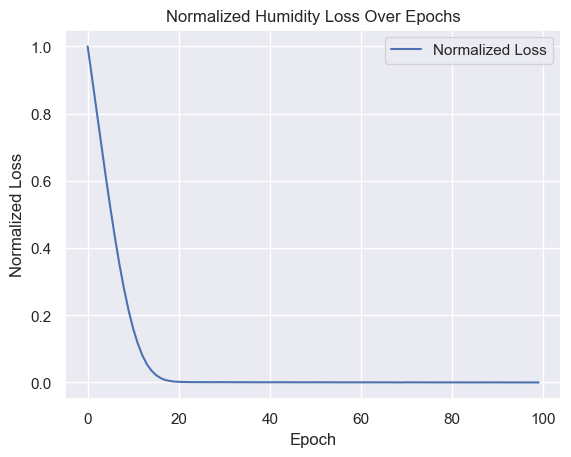

In [81]:
loss_humid = predicting_humid_model.evaluate(x_humid_test, y_humid_test)
print(f"Model Loss on Entire Dataset: {loss_humid}")
# Assuming `history.history['loss']` contains your loss values
loss_humid_values = history_humid.history['loss']

# Normalize the loss values
min_humid_loss = np.min(loss_humid_values)
max_humid_loss = np.max(loss_humid_values)
normalized_humid_loss = (loss_humid_values - min_humid_loss) / (max_humid_loss - min_humid_loss)

# Plot the normalized loss values
plt.plot(normalized_humid_loss, label='Normalized Loss')
plt.xlabel('Epoch')
plt.ylabel('Normalized Loss')
plt.title('Normalized Humidity Loss Over Epochs')
plt.legend()
plt.show()

### Calcuating the Error for the Error rate for humidity

In [82]:
predictions_humid_over_time = Alternative_filling_method.predict_future_temperatures(predicting_humid_model, reduced_df_sorted, reduced_df_sorted_1, selected_sensors_list, 'Humidity', num_steps=101)
predictions_humid_over_time = pd.concat(predictions_humid_over_time,ignore_index=True)
predictions_humid_over_time['error_humidity'] = np.abs(predictions_humid_over_time['Predicted_Humidity'] - predictions_humid_over_time['Actual_Humidity'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━

#### Generating Error heatmap video for Humidity

In [84]:
error_humid_output_dir = 'error_frames/humidity'
error_humid_frames = Alternative_filling_method.error_plotting(error_humid_output_dir,predictions_humid_over_time,'error_humidity', True)
reconstrucing_video.video_generation(error_humid_frames,'Error_humid_video.avi')

'Video saved as: Error_humid_video.avi'

#### Re-Construcing the humidity heatmap video with reduced number of sensors

In [85]:
humid_output_dir = 'reconstructed_heatmaps/humidity'
predicted_humid_frames = Alternative_filling_method.error_plotting(humid_output_dir,predictions_humid_over_time,'Predicted_Humidity', False)
reconstrucing_video.video_generation(predicted_humid_frames,'reconstructed_humid_heatmapvideo.avi')

'Video saved as: reconstructed_humid_heatmapvideo.avi'

#### Calculating Similarit Score for humidity heatmap videos

In [86]:
# Paths to your video files
video1_path = 'reconstructed_humid_heatmapvideo.avi'
video2_path = 'sensor_heatmaps_humidity_video.avi'

# Extract frames
video1_frames = testing_videos.extract_frames(video1_path)
video2_frames = testing_videos.extract_frames(video2_path)

# Compare videos
similarity_scores = testing_videos.compare_videos(video1_frames, video2_frames)

# Compute overall similarity
overall_score = testing_videos.overall_similarity(similarity_scores)

# Perform statistical tests
statistical_results = testing_videos.perform_statistical_tests(similarity_scores)

print(f"Overall similarity score of Humidity: {overall_score}")
print(f"T-test: T-statistic for humidity = {statistical_results['t-test'][0]}, P-value = {statistical_results['t-test'][1]}")
print(f"Wilcoxon fo humidity signed-rank test: Statistic = {statistical_results['Wilcoxon signed-rank test'][0]}, P-value = {statistical_results['Wilcoxon signed-rank test'][1]}")
print(f"Kolmogorov-Smirnov of humidity test: Statistic = {statistical_results['Kolmogorov-Smirnov test'][0]}, P-value = {statistical_results['Kolmogorov-Smirnov test'][1]}")


Overall similarity score of Humidity: 0.7128269320067596
T-test: T-statistic for humidity = 849.8471395444348, P-value = 0.0
Wilcoxon fo humidity signed-rank test: Statistic = 193791.0, P-value = 0.5235106890593308
Kolmogorov-Smirnov of humidity test: Statistic = 0.03867088364257909, P-value = 0.1356006078219033


### Calculating the Error

#### Calcuating Average Error Temperature and plotting the error rate

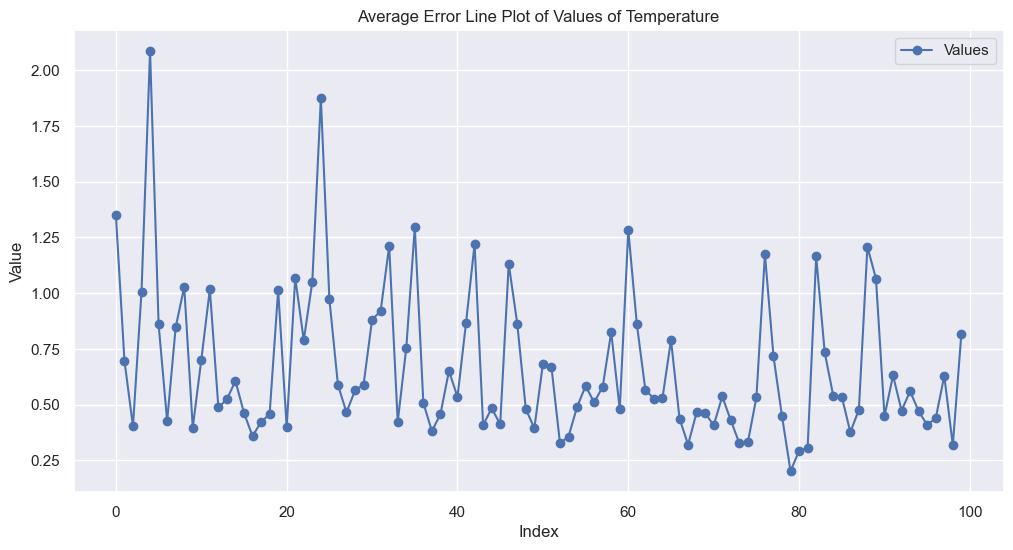

In [98]:
error = [np.average(predictions_temp_over_time.groupby('Sensor ID', observed=False).nth(i-1)['error_temperature'].tolist()) for i in range(2, 102)]

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(error, marker='o', linestyle='-', color='b', label='Values')
plt.title('Average Error Line Plot of Values of Temperature')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

#### Calculating the Mann-Whitney U Test on the predicted and actual data of temperature

In [88]:
# Original data
temp_values = np.array(predictions_temp_over_time['Actual_Temperature'])
filtered_values = np.array(predictions_temp_over_time['Predicted_Temperature'])

# Bootstrap method for confidence intervals
def bootstrap_confidence_interval(data, confidence=0.95, n_bootstrap=10000):
    bootstrap_samples = np.array([np.mean(resample(data)) for _ in range(n_bootstrap)])
    lower_bound = np.percentile(bootstrap_samples, (1 - confidence) / 2 * 100)
    upper_bound = np.percentile(bootstrap_samples, (1 + confidence) / 2 * 100)
    return lower_bound, upper_bound

# Confidence interval for Temperature
ci_temp = bootstrap_confidence_interval(temp_values)
print(f"Bootstrap 95% Confidence Interval for Temperature Mean: {ci_temp}")

# Confidence interval for Predicted Temperature
ci_predicted = bootstrap_confidence_interval(filtered_values)
print(f"Bootstrap 95% Confidence Interval for Predicted Temperature Mean: {ci_predicted}")

# Mann-Whitney U Test
u_statistic, p_value = stats.mannwhitneyu(temp_values, filtered_values, alternative='two-sided')
print(f"U-statistic: {u_statistic}, P-value: {p_value}")

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the distributions of Temperature and Predicted value.")
else:
    print("There is no significant difference between the distributions of Temperature and Predicted value.")


Bootstrap 95% Confidence Interval for Temperature Mean: (19.22634099264706, 19.271980217086835)
Bootstrap 95% Confidence Interval for Predicted Temperature Mean: (19.23140287399292, 19.26356725692749)
U-statistic: 16386390.0, P-value: 0.6790789897987495
There is no significant difference between the distributions of Temperature and Predicted value.


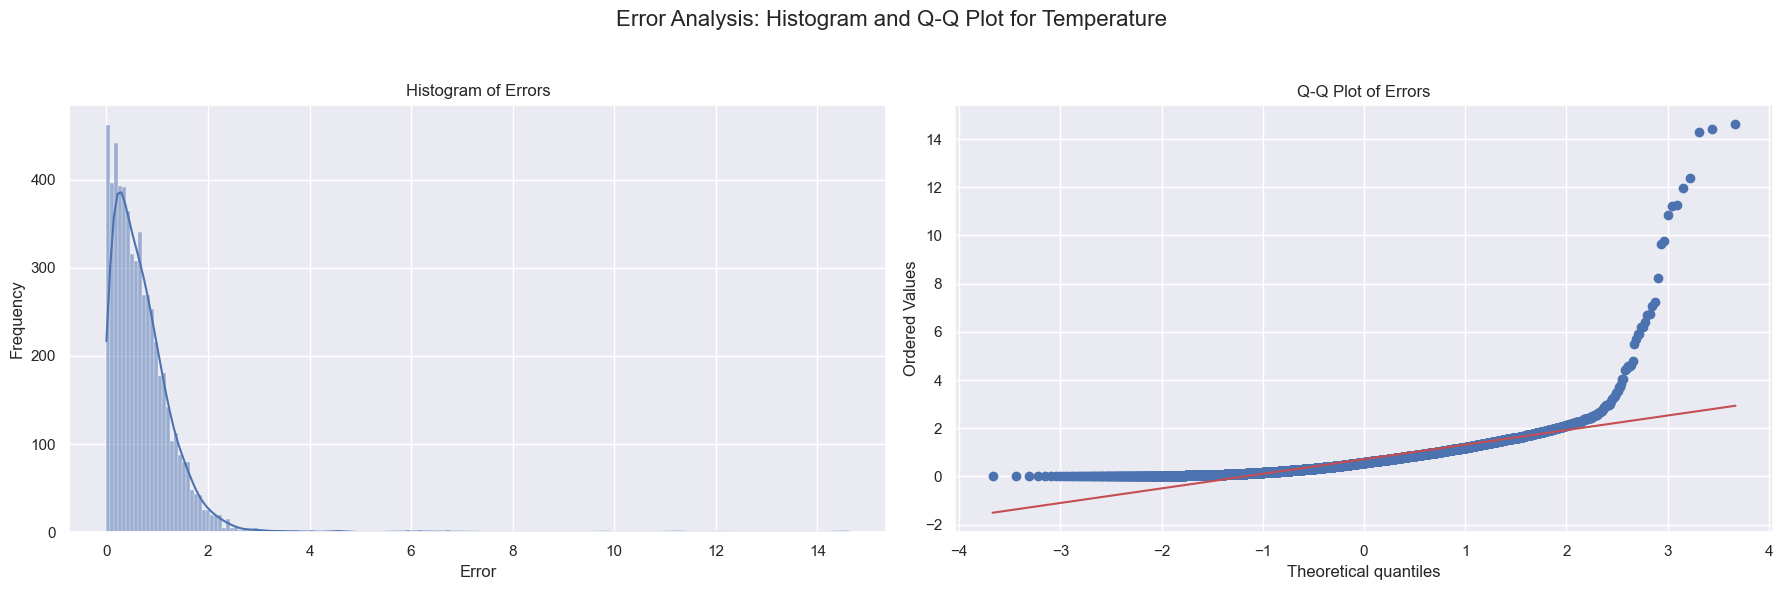

Correlation between actual and predicted temperatures: 0.04970169546717531


In [89]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot the histogram of errors on the first subplot
sns.histplot(predictions_temp_over_time['error_temperature'], kde=True, ax=axs[0])
axs[0].set_title('Histogram of Errors')
axs[0].set_xlabel('Error')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

# Plot the Q-Q plot of errors on the second subplot
probplot(predictions_temp_over_time['error_temperature'], dist="norm", plot=axs[1])
axs[1].set_title('Q-Q Plot of Errors')
axs[1].grid(True)

# Set a main title for the entire figure
fig.suptitle('Error Analysis: Histogram and Q-Q Plot for Temperature', fontsize=16)

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to accommodate the main title
plt.show()

correlation = predictions_temp_over_time['Actual_Temperature'].corr(predictions_temp_over_time['Predicted_Temperature'])
print(f"Correlation between actual and predicted temperatures: {correlation}")

#### Calcuating Average Error humidity and plotting the error rate

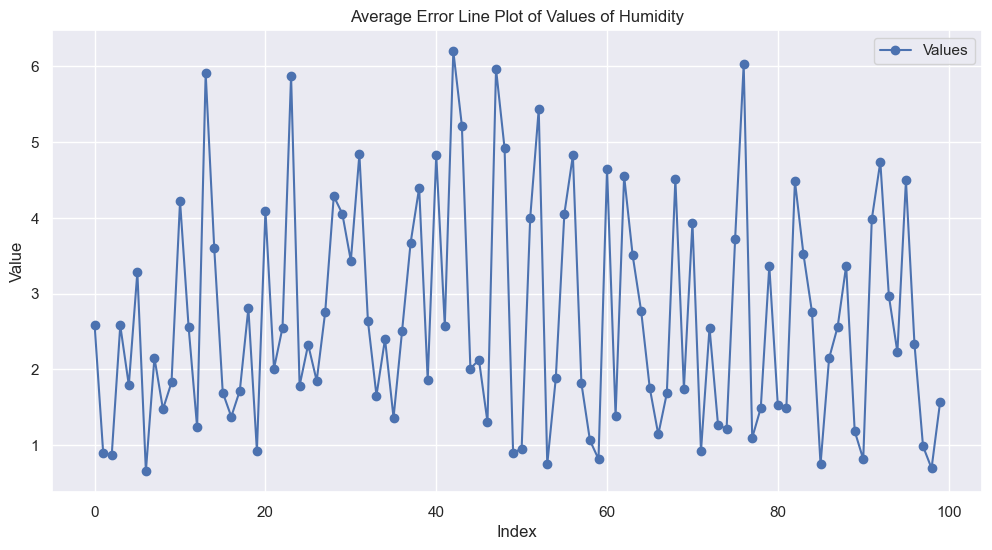

In [99]:
error_humid = [np.average(predictions_humid_over_time.groupby('Sensor ID', observed=False).nth(i-1)['error_humidity'].tolist()) for i in range(2, 102)]
# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(error_humid, marker='o', linestyle='-', color='b', label='Values')
plt.title('Average Error Line Plot of Values of Humidity')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

#### Calculating the Mann-Whitney U Test on the predicted and actual data of humidity

In [91]:
# Original data
humid_values = np.array(predictions_humid_over_time['Actual_Humidity'])
filtered_humid_values = np.array(predictions_humid_over_time['Predicted_Humidity'])

# Bootstrap method for confidence intervals
def bootstrap_confidence_interval(data, confidence=0.95, n_bootstrap=10000):
    bootstrap_samples = np.array([np.mean(resample(data)) for _ in range(n_bootstrap)])
    lower_bound = np.percentile(bootstrap_samples, (1 - confidence) / 2 * 100)
    upper_bound = np.percentile(bootstrap_samples, (1 + confidence) / 2 * 100)
    return lower_bound, upper_bound

# Confidence interval for Temperature
ci_humid = bootstrap_confidence_interval(humid_values)
print(f"Bootstrap 95% Confidence Interval for Humidity Mean: {ci_humid}")

# Confidence interval for Predicted Temperature
ci_predicted = bootstrap_confidence_interval(filtered_humid_values)
print(f"Bootstrap 95% Confidence Interval for Predicted Humidity Mean: {ci_predicted}")

# Mann-Whitney U Test
u_statistic, p_value = stats.mannwhitneyu(humid_values, filtered_humid_values, alternative='two-sided')
print(f"U-statistic: {u_statistic}, P-value: {p_value}")

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the distributions of Humidity and Predicted value.")
else:
    print("There is no significant difference between the distributions of Humidity and Predicted value.")

Bootstrap 95% Confidence Interval for Humidity Mean: (68.37424876237624, 68.52213176272986)
Bootstrap 95% Confidence Interval for Predicted Humidity Mean: (68.34901390075683, 68.46438655853271)
U-statistic: 16109125.0, P-value: 0.5117000499495048
There is no significant difference between the distributions of Humidity and Predicted value.


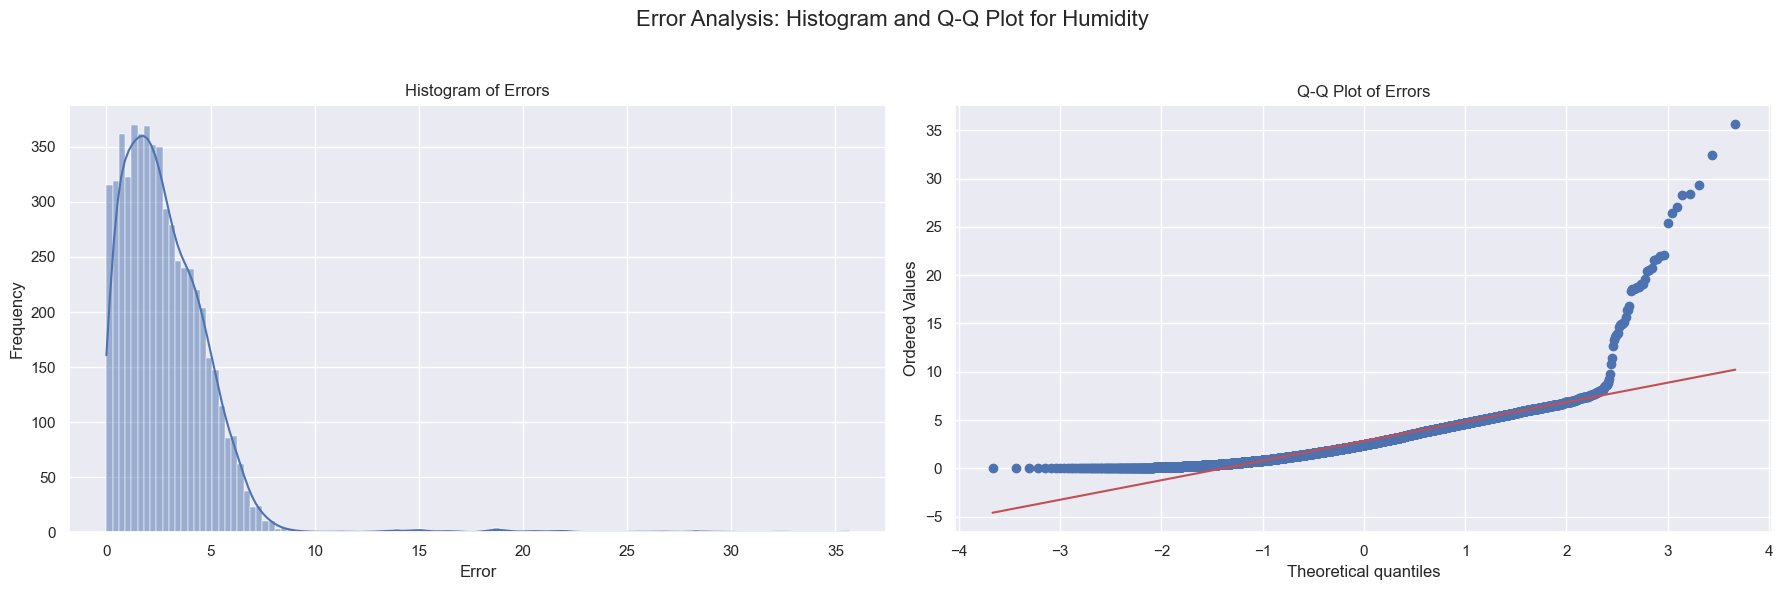

Correlation between actual and predicted Humidity: -0.009576909126592844


In [92]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot the histogram of errors on the first subplot
sns.histplot(predictions_humid_over_time['error_humidity'], kde=True, ax=axs[0])
axs[0].set_title('Histogram of Errors')
axs[0].set_xlabel('Error')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

# Plot the Q-Q plot of errors on the second subplot
probplot(predictions_humid_over_time['error_humidity'], dist="norm", plot=axs[1])
axs[1].set_title('Q-Q Plot of Errors')
axs[1].grid(True)

# Set a main title for the entire figure
fig.suptitle('Error Analysis: Histogram and Q-Q Plot for Humidity', fontsize=16)

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to accommodate the main title
plt.show()

correlation = predictions_humid_over_time['Actual_Humidity'].corr(predictions_humid_over_time['Predicted_Humidity'])
print(f"Correlation between actual and predicted Humidity: {correlation}")

### Gasussina Kernal

In [95]:
from scipy.ndimage import gaussian_filter

def reconstructed_humidity_frames_generation(reduced_df_sorted, data, column):
    """
    Generates heatmap frames with Gaussian smoothed data from a reduced dataset and saves them.

    Parameters:
    - output_dir: Directory where the generated frames will be saved.
    - reduced_df_sorted: Reduced and sorted DataFrame based on sensor readings.
    - data: Dictionary containing sensor ID to matrix position mapping.
    - column: Column name for which the heatmap is generated.

    Returns:
    - frames: List of file paths to the generated heatmap images.
    - sensor_id_filtered_df: DataFrame mapping sensor IDs to their filtered values.
    """

    sensor_id_to_filtered_value = []
    temp_dataset = reduced_df_sorted.groupby('Sensor ID', observed=False).nth(-1).reset_index()

    # Prepare an empty matrix
    rows, cols = 8, 7
    sensor_matrix = np.zeros((rows, cols), dtype=float)

    sensor_positions = {}  # To map sensor_id to their matrix position
    for sensor_id, (row, col) in data.items():
        sensor_positions[sensor_id] = (rows - row, col - 1)
        if sensor_id in temp_dataset['Sensor ID'].astype(str).values:
            temp_value = temp_dataset[temp_dataset['Sensor ID'].astype(str) == sensor_id][column].values
            if len(temp_value) > 0:
                sensor_matrix[rows - row, col - 1] = temp_value[0]

    # Apply Gaussian filter for smoothing
    sigma = min(max(np.std(sensor_matrix), 1), 5)
    smoothed_data = gaussian_filter(sensor_matrix, sigma=sigma, mode='nearest')

    # Replace zeros with smoothed values
    filled_data = np.where(sensor_matrix == 0, smoothed_data, sensor_matrix)

    # Map filtered values back to sensor_ids
    for sensor_id, (row, col) in sensor_positions.items():
        filtered_value = filled_data[row, col]
        sensor_id_to_filtered_value.append({'Sensor ID': sensor_id, 'Filtered Value': filtered_value})

    # Plot and save the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(filled_data, annot=False, cmap="YlGnBu", fmt=".2f", cbar=False, xticklabels=False, yticklabels=False)
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.show()

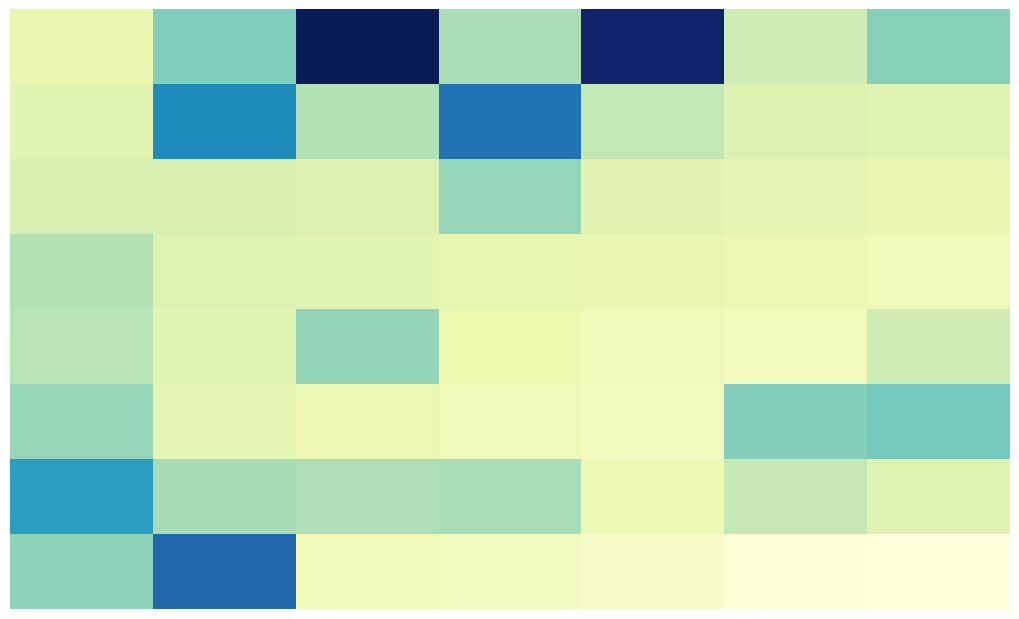

In [96]:
reconstructed_humidity_frames_generation(reduced_df_sorted,data,'Temperature')

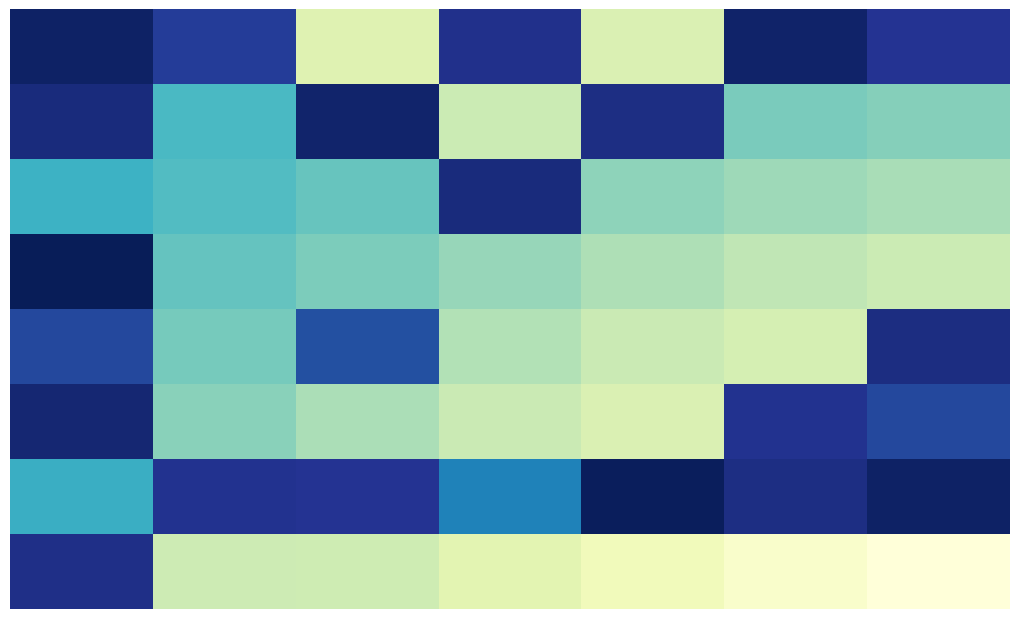

In [97]:
reconstructed_humidity_frames_generation(reduced_df_sorted,data,'Humidity')